# ML Lab Assignment 3
## N. Sai Karthik AP21110010310 CSE-E

### Lab-7

1. Implement Decision Tree Classifier for classification of Iris dataset
a. Load the data set
b. Split the data set to train and test sets
c. Train a Decision Tree using train set
d. Test the model using test set. Find accuracy and confusion Matrix.

In [134]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


warnings.filterwarnings('ignore')


In [99]:
df=pd.read_csv("/Users/saikarthik/Desktop/ml algorithms from scratch /ML_Lab/Iris.csv")

In [100]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [101]:
X=df.iloc[:,: -1]
Y=df.iloc [:, -1]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 

In [103]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)

In [104]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [105]:
y_pred = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [106]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
print(" ")
print("Accuracy : ",accuracy_score(y_test, y_pred)*100)


Confusion Matrix:  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
 
Accuracy :  100.0


Implement Random Forest Classifier for classification of Iris dataset
a. Load the data set
b. Split the data set to train and test sets
c. Train a Random Forest model using train set
d. Test the model using test set. Find accuracy and confusion Matrix.

In [107]:
clf = RandomForestClassifier(n_estimators = 100)  


In [108]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
ypred = clf.predict(X_test)


In [110]:
print("Confusion Matrix: ",confusion_matrix(y_test, ypred))
print(" ")
print("Accuracy : ",accuracy_score(y_test, ypred)*100)

Confusion Matrix:  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
 
Accuracy :  100.0


### Lab-8

1. Implement K-NN Classifier for classification of any dataset of your choice.
a. Load an existing data set
b. Split the data set to train and test sets
c. Test your model using test set. Find accuracy and confusion Matrix.
d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
accuracy” and find out the value of k for maximum accuracy for the test samples.

In [112]:
import numpy as np
import scipy.spatial
from collections import Counter

In [118]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42, test_size = 0.2)


In [119]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)
    
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)
            
        return final_output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

In [120]:
clf = KNN(3)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [121]:
prediction == y_test


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [126]:
clf.score(X_test, y_test)*100

100.0

In [131]:
cm = confusion_matrix(y_test, prediction)
cm


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

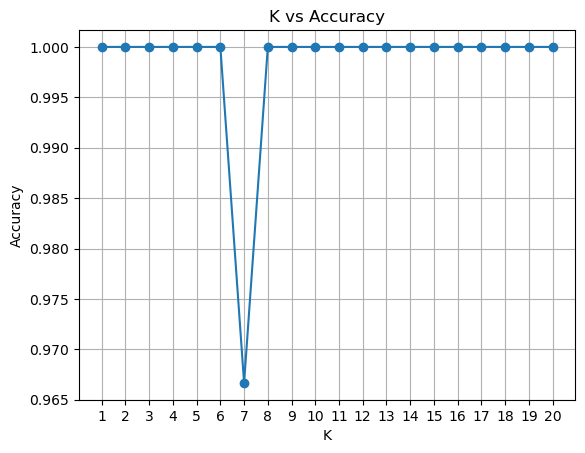

The value of K for maximum accuracy is: 1
The maximum accuracy achieved is: 100.0


In [135]:

k_values = range(1, 21)  

accuracy_values = []

for k in k_values:
    clf = KNN(k)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

max_accuracy = max(accuracy_values)
best_k = k_values[accuracy_values.index(max_accuracy)]

plt.plot(k_values, accuracy_values, marker='o')
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print(f"The value of K for maximum accuracy is: {best_k}")
print(f"The maximum accuracy achieved is: {max_accuracy*100}")
